In [1]:
%pylab inline
import pandas as pd
import numpy as np
from datetime import datetime
import os
from os.path import join

Populating the interactive namespace from numpy and matplotlib


In [2]:
from ipywidgets import interact,interact_manual,IntSlider,FloatSlider

In [3]:
%run customTypes
%run thermocouple
#from qms_jupyter import data as qms_data, plot_qms

In [4]:
desk = join(os.path.expanduser("~"),"Desktop", "Data")
drop = join(os.path.expanduser("~"),"Dropbox", "workspace","data")
drop = join(os.path.expanduser("~"),"Dropbox", "Experiments","2019-Ito-kun","Data")

In [5]:
dr = drop
temp_dir = os.path.join(dr, "Temperature")
pres1_dir = os.path.join(dr, "Pressure1")
pres2_dir = os.path.join(dr, "Pressure2")

In [6]:
%run notebooktools.py

In [7]:
lst = [i for i in sorted(os.listdir(temp_dir)) if i.startswith('out')]
sz = np.array([os.path.getsize(join(temp_dir,i)) for i in lst])
ind = list(np.where(sz>150)[0])
lst = [lst[i] for i in ind]

In [11]:
#lst = [i for i in sorted(os.listdir(temp_dir)) if i.startswith('out')]
%run thermocouple
%run notebooktools.py
font_setup(size=14)

@interact
def absd(
    fname = lst,
    #i = FloatSlider(0.001,min=0.001,max=0.1,step = 0.001),
    i = IntSlider(300,min=1,max=500),
    #j = IntSlider(0,len(lst))
):    
    data = pd.read_csv(join(temp_dir,fname))
    #plot(data['Time'],data['Temperature'])
    data = ThreadType.TEMPERATURE.getCalcArray(np.array(data))    
    plot(data[:,0],data[:,1])
    ylim([-10,i])
    
    ticks_visual(gca())
    grid_visual(gca())
    xlabel('time, min')
    ylabel('T, C')
    
    print(lst.index(fname))    

<Figure size 432x288 with 0 Axes>

interactive(children=(Dropdown(description='fname', options=('out_20191226185147.csv', 'out_20191226190613.csv…

# Improving speed of temperature calculator

In [13]:
fname = lst[22]
data = pd.read_csv(join(temp_dir,fname))
ndata = np.array(data)
ind = np.where(ndata[:,1]<0.3)
fdata = ndata[ind]

data.shape

(11742, 3)

## timeit

In [87]:
%timeit data['Temperature']*10

78.9 µs ± 719 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [88]:
%timeit ThreadType.TEMPERATURE.getCalcArray(np.array(data))  

895 ms ± 6.02 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [128]:
%timeit maskTemp(np.array(data))

890 ms ± 4.04 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [131]:
%timeit maskTemp(ndata)

891 ms ± 3.68 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [132]:
%timeit calcTemp(100)

71.9 µs ± 450 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [139]:
import tc

In [159]:
%timeit tc.Thermocouple.mv_to_typek(12)

2.82 µs ± 25.1 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [119]:
a = np.ones(10)
b = np.arange(10,20)
print(a)
print(b)
a*b

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[10 11 12 13 14 15 16 17 18 19]


array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

In [124]:
p = np.poly1d(np.ones(10))
p(2)

1023.0

Text(0, 0.5, 'T, mV')

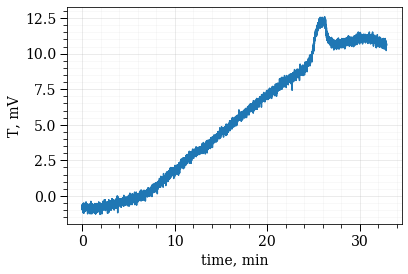

In [14]:
%run notebooktools.py
font_setup(size=14)
plot(fdata[:,0]/60,fdata[:,1]/1e-3)

ticks_visual(gca())
grid_visual(gca())
xlabel('time, min')
ylabel('T, mV')

In [188]:
%timeit [tc.Thermocouple.mv_to_typek(i) for i in fdata[:,1]]

34.5 ms ± 499 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [19]:
temperature = np.array([tc.Thermocouple.mv_to_typek(i) for i in fdata[:,1]/1e-3])

Text(0, 0.5, 'T, C')

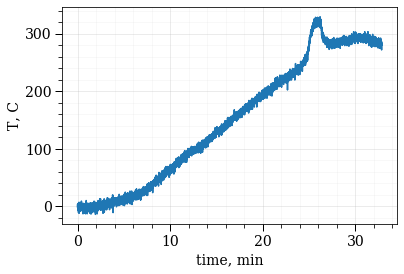

In [21]:
%run notebooktools.py
font_setup(size=14)
plot(fdata[:,0]/60,temperature+20)

ticks_visual(gca())
grid_visual(gca())
xlabel('time, min')
ylabel('T, C')